<a href="https://colab.research.google.com/github/SjSterling/datasets/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing and Training on Combined Data:

Combine the datasets about professors and courses into a single dataset or format that the model can understand.
Train a language model (or a separate model) on this combined dataset to understand both the context around professors' quality and the specifics of courses.
Building Specialized Models:

After training on the combined dataset, fine-tune or build specialized models for:
Professor Quality Prediction
Sentiment Analysis on comments
Question Answering about Professors and Courses
Creating Separate Scripts:
Sentiment Analysis Script: This script would take a text input (e.g., a comment about a professor) and analyze its sentiment using the sentiment analysis model trained on comments.

Quality Prediction Script: Use the quality prediction model to predict the quality of a professor based on different features.

Question Answering Script: Develop a script specifically for question answering related to professors and courses using the question answering model trained on combined professor and course data.

Workflow:
Training Phase:

Train a unified model on combined datasets.
Fine-tune and derive specialized models for various tasks.
Application Phase:

Utilize these specialized models in different scripts or modules to cater to specific user queries or tasks.
Training the model on a combined dataset initially can help it understand the relationships between professors and courses. This can be beneficial when later building specialized models for specific tasks like professor quality prediction, sentiment analysis, and question answering.




Got it! To link the professor comments that mention specific classes with their respective descriptions from the course dataset, you can follow these steps:

Preprocessing:

Tokenize and process both professor comments and course descriptions.
Extract the course names or identifiers from both datasets.
Matching:

Search for course names or identifiers mentioned in professor comments within the course descriptions.
Create a mapping between the courses mentioned in professor comments and their descriptions.
Utilize the Mapping:

Use this mapping during inference or analysis.
When a professor comment mentions a course, retrieve the corresponding course description from the mapping.
For example, if a comment mentions "ENGL1101," search for "ENGL1101" within the course descriptions. If there's a match, retrieve the description for "ENGL1101."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Data interpetation**

In [2]:
# reading in the data

df = pd.read_csv('/content/Rate_My_Professors_Reviews (1).csv')

In [3]:
df.head()

,Professor_ID,Professor_Name,University,Department,Quality,Difficulty,Class_Name,Comment,Thumbs_Up,Thumbs_Down,Review_Date
0,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022"
1,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL2080,This teacher is amazing! You will struggle if ...,0,0,"Apr 27th, 2022"
2,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL2080,Dr. Sewell is great! Assignments are very clea...,0,0,"Dec 9th, 2021"
3,100888,Donna Sewell,Valdosta State University,English department,3.0,5,ENGL1101,"Hardest class I have ever taken, it was a high...",0,0,"Jan 29th, 2018"
4,100888,Donna Sewell,Valdosta State University,English department,5.0,3,ENGL2080,"I love Dr. Sewell. She is tough with grades, b...",0,0,"Jan 4th, 2018"


In [4]:
print(df.shape)

(9658, 11)


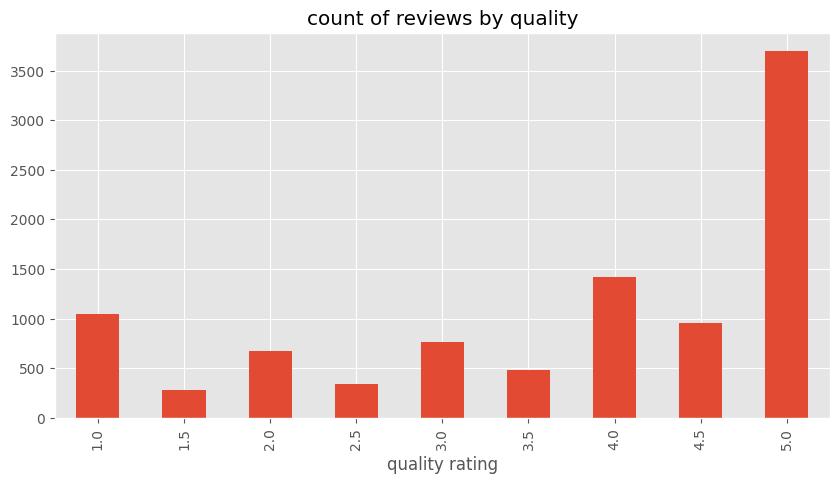

In [5]:
ax = df['Quality'].value_counts().sort_index()\
.plot(kind='bar',
      title='count of reviews by quality', figsize=(10,5))
ax.set_xlabel('quality rating')
plt.show()



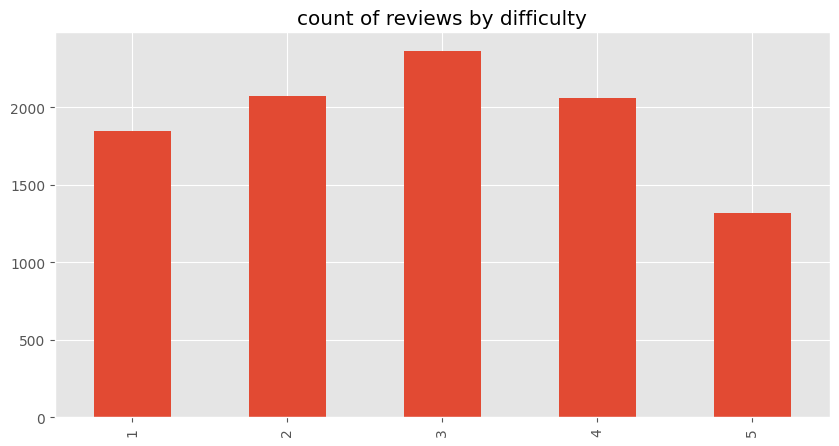

In [6]:
df['Difficulty'].value_counts().sort_index()\
.plot(kind='bar',
      title='count of reviews by difficulty', figsize=(10,5))
ax.set_xlabel('difficulty rating')
plt.show()


#Data Tokenization

In [7]:
example = df['Comment'][100]
print(example)

He definitely takes the training wheels off in this course. The only real gripe I have is that if it seems intuitive to him the rest of the class is blown away confused. He likes people to speak and ask questions if you are looking for brownie points.


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['He',
 'definitely',
 'takes',
 'the',
 'training',
 'wheels',
 'off',
 'in',
 'this',
 'course']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('He', 'PRP'),
 ('definitely', 'RB'),
 ('takes', 'VBZ'),
 ('the', 'DT'),
 ('training', 'NN'),
 ('wheels', 'NNS'),
 ('off', 'RP'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('course', 'NN')]

In [10]:
ent = nltk.chunk.ne_chunk(tagged)

ent.pprint()

(S
  He/PRP
  definitely/RB
  takes/VBZ
  the/DT
  training/NN
  wheels/NNS
  off/RP
  in/IN
  this/DT
  course/NN
  ./.
  The/DT
  only/JJ
  real/JJ
  gripe/NN
  I/PRP
  have/VBP
  is/VBZ
  that/IN
  if/IN
  it/PRP
  seems/VBZ
  intuitive/JJ
  to/TO
  him/PRP
  the/DT
  rest/NN
  of/IN
  the/DT
  class/NN
  is/VBZ
  blown/VBN
  away/RB
  confused/JJ
  ./.
  He/PRP
  likes/VBZ
  people/NNS
  to/TO
  speak/VB
  and/CC
  ask/VB
  questions/NNS
  if/IN
  you/PRP
  are/VBP
  looking/VBG
  for/IN
  brownie/NN
  points/NNS
  ./.)


# Defining sentiment scores to each comment

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()


In [12]:
sia.polarity_scores('i want to kill myself')

{'neg': 0.588, 'neu': 0.25, 'pos': 0.163, 'compound': -0.6597}

In [13]:
sia.polarity_scores(example)

{'neg': 0.044, 'neu': 0.849, 'pos': 0.106, 'compound': 0.4939}

In [14]:
example

'He definitely takes the training wheels off in this course. The only real gripe I have is that if it seems intuitive to him the rest of the class is blown away confused. He likes people to speak and ask questions if you are looking for brownie points.'

In [15]:
import numpy as np

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    comment = row['Comment']
    myid = row['Professor_Name']  # Corrected column name

    if myid not in res:
        res[myid] = []  # Create an empty list for comments if the ID is encountered for the first time

    if isinstance(comment, str):  # Check if the comment is a string
        res[myid].append(comment)

# Calculate sentiment scores for each professor's comments
for myid, comments in res.items():
    sentiment_scores = []
    for comment in comments:
        sentiment_scores.append(sia.polarity_scores(comment))
    res[myid] = sentiment_scores



  0%|          | 0/9658 [00:00<?, ?it/s]

In [16]:
res

{'Donna Sewell': [{'neg': 0.018,
   'neu': 0.822,
   'pos': 0.16,
   'compound': 0.8939},
  {'neg': 0.056, 'neu': 0.692, 'pos': 0.252, 'compound': 0.9391},
  {'neg': 0.025, 'neu': 0.614, 'pos': 0.361, 'compound': 0.9717},
  {'neg': 0.06, 'neu': 0.787, 'pos': 0.153, 'compound': 0.7579},
  {'neg': 0.072, 'neu': 0.647, 'pos': 0.282, 'compound': 0.9557},
  {'neg': 0.059, 'neu': 0.805, 'pos': 0.136, 'compound': 0.6956},
  {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.9287},
  {'neg': 0.022, 'neu': 0.792, 'pos': 0.186, 'compound': 0.9213},
  {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2732},
  {'neg': 0.078, 'neu': 0.889, 'pos': 0.033, 'compound': -0.5106},
  {'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'compound': 0.5197},
  {'neg': 0.083, 'neu': 0.652, 'pos': 0.265, 'compound': 0.9105},
  {'neg': 0.031, 'neu': 0.809, 'pos': 0.16, 'compound': 0.818},
  {'neg': 0.028, 'neu': 0.734, 'pos': 0.237, 'compound': 0.8779},
  {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.95

In [17]:
max_len = max(len(scores) for scores in res.values())
for myid, scores in res.items():
    res[myid] = scores + [np.nan] * (max_len - len(scores))
df_res = pd.DataFrame(res).T


In [18]:
vaders=df_res
vaders = vaders.reset_index().rename(columns={'index':'Professor_Name'})
vaders = vaders.merge(df, how='left')

In [19]:
import numpy as np

res_2 = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    comment = row['Comment']
    if isinstance(comment, str):  # Check if the comment is a string
        sentiment = sia.polarity_scores(comment)
        res_2.append(sentiment)
    else:
        # Handle NaN values, you can choose to skip or assign a default value
        res_2.append({'compound': np.nan, 'pos': np.nan, 'neg': np.nan, 'neu': np.nan})


  0%|          | 0/9658 [00:00<?, ?it/s]

In [20]:
res_2

[{'neg': 0.018, 'neu': 0.822, 'pos': 0.16, 'compound': 0.8939},
 {'neg': 0.056, 'neu': 0.692, 'pos': 0.252, 'compound': 0.9391},
 {'neg': 0.025, 'neu': 0.614, 'pos': 0.361, 'compound': 0.9717},
 {'neg': 0.06, 'neu': 0.787, 'pos': 0.153, 'compound': 0.7579},
 {'neg': 0.072, 'neu': 0.647, 'pos': 0.282, 'compound': 0.9557},
 {'neg': 0.059, 'neu': 0.805, 'pos': 0.136, 'compound': 0.6956},
 {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.9287},
 {'neg': 0.022, 'neu': 0.792, 'pos': 0.186, 'compound': 0.9213},
 {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2732},
 {'neg': 0.078, 'neu': 0.889, 'pos': 0.033, 'compound': -0.5106},
 {'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'compound': 0.5197},
 {'neg': 0.083, 'neu': 0.652, 'pos': 0.265, 'compound': 0.9105},
 {'neg': 0.031, 'neu': 0.809, 'pos': 0.16, 'compound': 0.818},
 {'neg': 0.028, 'neu': 0.734, 'pos': 0.237, 'compound': 0.8779},
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9579},
 {'neg': 0.0, 'neu': 0.768, 'pos': 

In [21]:
df_res_2= pd.DataFrame(res_2).T
vaders_2=df_res_2
vaders_2 = vaders.reset_index().rename(columns={'index':'Professor_Name'})
vaders_2 = vaders.merge(df, how='left')

In [22]:
import pandas as pd

df_res_2 = pd.DataFrame(res_2)

vaders_2 = pd.concat([df.reset_index(drop=True), df_res_2.reset_index(drop=True)], axis=1)

new_column_names = {i: f'Sentiment_{i}' for i in range(df_res_2.shape[1])}
vaders_2 = vaders_2.rename(columns=new_column_names)

vaders_2.set_index('Professor_Name', inplace=True)


In [23]:
vaders_2.head()

,Professor_ID,University,Department,Quality,Difficulty,Class_Name,Comment,Thumbs_Up,Thumbs_Down,Review_Date,neg,neu,pos,compound
Professor_Name,,,,,,,,,,,,,,
Donna Sewell,100888,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.018,0.822,0.160,0.8939
Donna Sewell,100888,Valdosta State University,English department,5.0,4,ENGL2080,This teacher is amazing! You will struggle if ...,0,0,"Apr 27th, 2022",0.056,0.692,0.252,0.9391
Donna Sewell,100888,Valdosta State University,English department,5.0,4,ENGL2080,Dr. Sewell is great! Assignments are very clea...,0,0,"Dec 9th, 2021",0.025,0.614,0.361,0.9717
Donna Sewell,100888,Valdosta State University,English department,3.0,5,ENGL1101,"Hardest class I have ever taken, it was a high...",0,0,"Jan 29th, 2018",0.060,0.787,0.153,0.7579
Donna Sewell,100888,Valdosta State University,English department,5.0,3,ENGL2080,"I love Dr. Sewell. She is tough with grades, b...",0,0,"Jan 4th, 2018",0.072,0.647,0.282,0.9557


# Sentiment score relation to quality and difficulty graphs


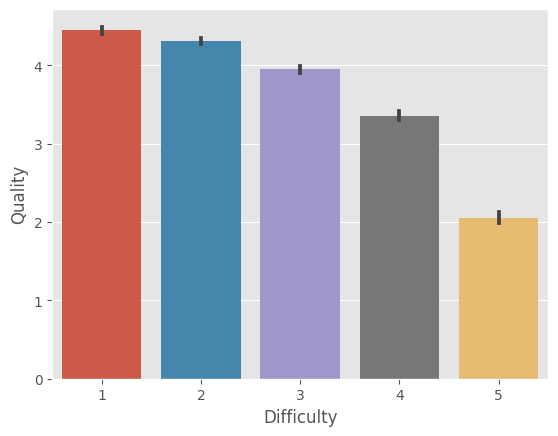

In [24]:
sns.barplot(data=vaders_2, x='Difficulty', y='Quality')
ax.set_title('Relation between dificulty and quality score given')
plt.show()

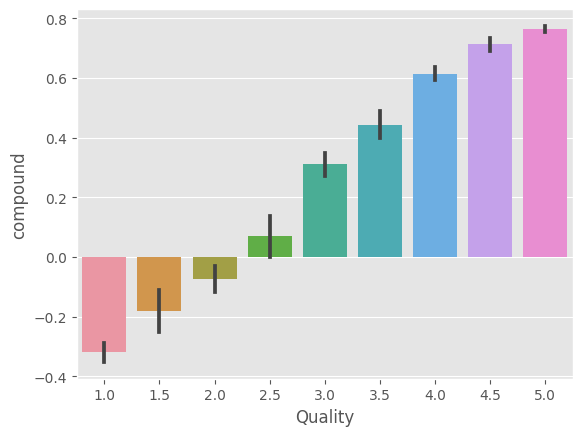

In [25]:
sns.barplot(data=vaders_2, x='Quality', y='compound')
ax.set_title('Compund score of rate my proffesor reviews')
plt.show()


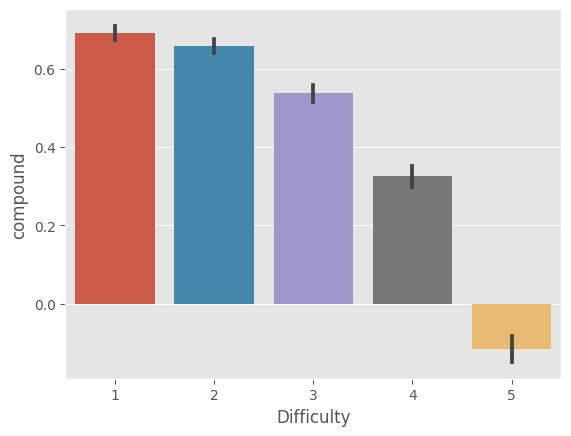

In [26]:
sns.barplot(data=vaders_2, x='Difficulty', y='compound')
ax.set_title('Compound score of rate my proffesor reviews')
plt.show()

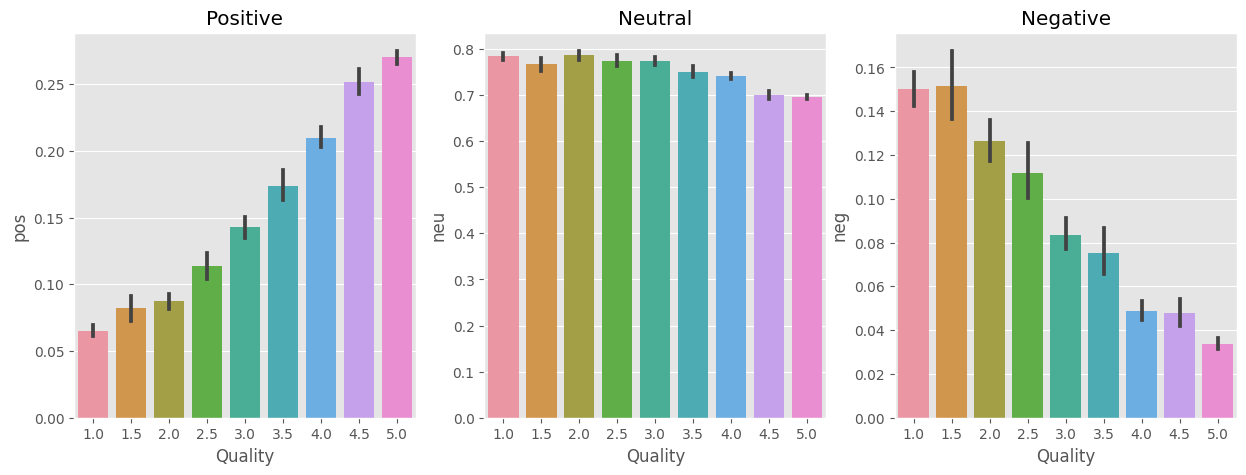

In [27]:
fig, axs = plt.subplots(1,3, figsize =(15, 5))
sns.barplot(data=vaders_2, x='Quality',y='pos', ax=axs[0])
sns.barplot(data=vaders_2, x='Quality',y='neu', ax=axs[1])
sns.barplot(data=vaders_2, x='Quality',y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()




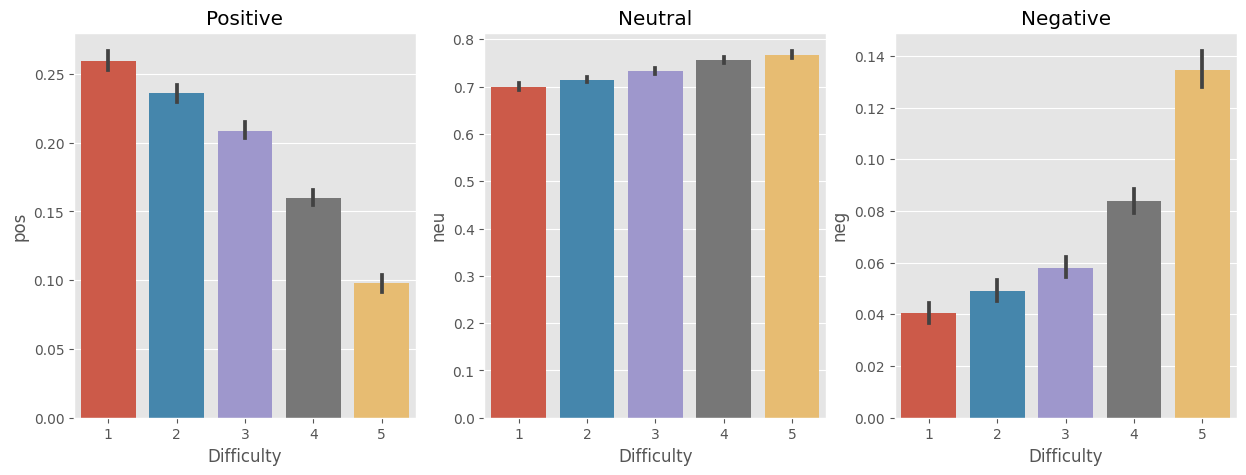

In [28]:
fig, axs = plt.subplots(1,3, figsize =(15, 5))
sns.barplot(data=vaders_2, x='Difficulty',y='pos', ax=axs[0])
sns.barplot(data=vaders_2, x='Difficulty',y='neu', ax=axs[1])
sns.barplot(data=vaders_2, x='Difficulty',y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

#Transforming based model (distilroberta)


In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [30]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForMaskedLM.from_pretrained("distilroberta-base")

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [32]:
print(example)
sia.polarity_scores(example)

He definitely takes the training wheels off in this course. The only real gripe I have is that if it seems intuitive to him the rest of the class is blown away confused. He likes people to speak and ask questions if you are looking for brownie points.


{'neg': 0.044, 'neu': 0.849, 'pos': 0.106, 'compound': 0.4939}

In [33]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.2764619, 'roberta_neu': 0.5068167, 'roberta_pos': 0.21672142}


In [34]:
from scipy.special import softmax
import torch

# Assuming 'example' is your input, 'tokenizer' is your tokenizer, and 'model' is your neural network model

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict ={
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2]
}
print(scores_dict)


{'rob_neg': 0.2764619, 'rob_neu': 0.5068167, 'rob_pos': 0.21672142}


In [35]:
def polarity_scores_rob(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict ={
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2]
}
  return scores_dict


In [36]:
res_2 = []
results_dict = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    comment = str(row['Comment'])  # Convert comment to string explicitly
    professor_id = row['Professor_ID']

    if isinstance(comment, str):
        sentiment = sia.polarity_scores(comment)
        res_2.append(sentiment)
    else:
        res_2.append({'compound': np.nan, 'pos': np.nan, 'neg': np.nan, 'neu': np.nan})

    vader_result = sia.polarity_scores(comment)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

    rob_result = polarity_scores_rob(comment)
    both = {**vader_result_rename, **rob_result}

    if professor_id not in results_dict:
        results_dict[professor_id] = []

    results_dict[professor_id].append(both)

# Now 'results_dict' contains lists of results for each professor ID


  0%|          | 0/9658 [00:00<?, ?it/s]

In [39]:
import pandas as pd

# Assuming df is your original DataFrame

# Convert results_dict into a DataFrame
results_list = []
for professor_id, results_list_per_id in results_dict.items():
    for result in results_list_per_id:
        result['Professor_ID'] = professor_id
        results_list.append(result)

# Create a DataFrame from the results_dict
results_df_new = pd.DataFrame(results_list)

# Merge the new results DataFrame with the original DataFrame df
merged_df = df.merge(results_df_new, on='Professor_ID', how='left')


In [48]:
merged_df.head()

,Professor_ID,Professor_Name,University,Department,Quality,Difficulty,Class_Name,Comment,Thumbs_Up,Thumbs_Down,Review_Date,vader_neg,vader_neu,vader_pos,vader_compound,rob_neg,rob_neu,rob_pos
0,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.018,0.822,0.160,0.8939,0.005372,0.056026,0.938602
1,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.056,0.692,0.252,0.9391,0.003595,0.011355,0.985050
2,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.025,0.614,0.361,0.9717,0.006068,0.033173,0.960758
3,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.060,0.787,0.153,0.7579,0.066753,0.257237,0.676009
4,100888,Donna Sewell,Valdosta State University,English department,5.0,4,ENGL1101,"For an ENGL1101 class, Dr. Sewell seems hard, ...",0,0,"Oct 13th, 2022",0.072,0.647,0.282,0.9557,0.006103,0.033115,0.960782


In [49]:
merged_df.to_csv('merged_data.csv', index=False)
